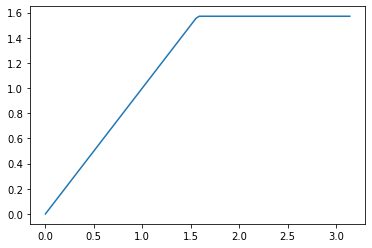

In [1]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.integrate import quad

## Define the function
def func(xvals):
    yvals = np.zeros(len(xvals))
    for i, j in enumerate(xvals):
        if j < 0:
            yvals[i] = 0
        if j < np.pi/2 and j >= 0:
            yvals[i] = 1*j
        if j <= np.pi and j > np.pi/2:
            yvals[i] = np.pi/2
        if j > np.pi:
            yvals[i] = 0
    return yvals
    
xvals = np.linspace(0, np.pi, 100, endpoint=True)
f_x = func(xvals)
plot.plot(xvals,f_x)

In [4]:
#Even periodic extension
n=50 
An=[] 
sum=0
sum_1=0

### Define the integrand for an
fc = lambda x: (1*xvals)*np.cos(i*xvals) if (xvals < np.pi/2 and xvals >= 0) else (np.pi/2)*np.cos(i*xvals) if (xvals <= np.pi and xvals > np.pi/2) else 0

for i in range(n):
     an=quad(fc,0,np.pi/2)[0]*(2.0/np.pi)+quad(fc,np.pi/2,np.pi)[0]*(2.0/np.pi)
     An.append(an)

for i in range(n):
     if i==0.0:
         sum=sum+An[i]/2 #i.e -> A0
     else:
         sum=sum+(An[i]*np.cos(i*xvals))
            
#odd extrapolation
fs=lambda x: (1*xvals)*np.sin(i*xvals) if (xvals < np.pi/2 and xvals >= 0) else (np.pi/2)*np.sin(i*xvals) if (xvals <= np.pi and xvals > np.pi/2) else 0
for i in range(n):
     bn=quad(fs,0,np.pi/2)[0]*(2.0/np.pi)+quad(fs,np.pi/2,np.pi)[0]*(2.0/np.pi)
     Bn.append(bn)

for i in range(n):
    sum1=sum1+(Bn[i]*np.sin(i*xvals))
plt.plot(xvals,sum,'g')

plt.title("even extrapolation")
plt.xlabel('x range')
plt.ylabel('Function f(x)')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
#Using sympy to obtain even and odd extrapolations.
#Even periodic extension

from sympy import *
from sympy.abc import x
from sympy import pi
from sympy import cos, sin
n = symbols('n',real = True,positive = True)
L=pi
A0 = (1/L)*(integrate(x,(x,0,L/2)) + integrate(pi/2,(x,L/2,L)) ).simplify()
An = (2/L)*(integrate(x*cos(n*x*pi/L),(x,0,L/2)) + integrate(pi/2*cos(n*x*pi/L),(x,L/2,L)) ).simplify()
f_x_even = A0 +An*cos(n*x*pi/L)
f_x_even

3*pi/8 + 2*(pi*n*sin(pi*n)/2 + cos(pi*n/2) - 1)*cos(n*x)/(pi*n**2)

In [6]:
#Odd periodic extension

Bn = (2/L)*(integrate(x*sin(n*x*pi/L),(x,0,L/2)) + integrate(pi/2*sin(n*x*pi/L),(x,L/2,L)) ).simplify()
f_x_odd = Bn
f_x_odd

2*(-pi*n*cos(pi*n)/2 + sin(pi*n/2))/(pi*n**2)

In [7]:
### Even expansion
AN = 0
for i in range(4):
    a=i+1
    AN += An.subs([(n,a),(pi,3.14)])*cos(n*x*pi/L).subs([(n,a),(pi,3.14)])
even_ext = A0 + AN

In [8]:
### Odd expansion
BN = 0
for i in range(4):
    a=i+1
    BN += Bn.subs([(n,a),(pi,3.14)])*sin(n*x*pi/L).subs([(n,a),(pi,3.14)])
odd_ext = BN